In [1]:
import spotpy
import os
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import import_ipynb
#from ipynb.fs.full.Bloque_CanalAWGN import EjecucionCanal

In [2]:
data=pd.read_excel("Dataset.xlsx")
data2=pd.read_excel("Dataset_R.xlsx")

In [3]:
#Obtener los datos de excel
matriz_datos=data.values
Tiempo=[]
BPM=[] #Valores de latidos por minuto
for i in range(len(matriz_datos)):
    Tiempo.append(matriz_datos[i][0])
    BPM.append(matriz_datos[i][1])
    
    
#Obtener los datos de excel 2
matriz_datos2=data2.values
Tiempo2=[]
BPM2=[] #Valores de latidos por minuto
for i in range(len(matriz_datos2)):
    Tiempo2.append(matriz_datos2[i][0])
    BPM2.append(matriz_datos2[i][1])

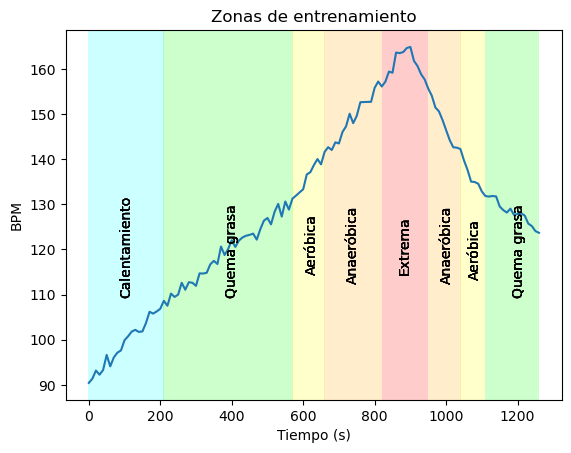

In [4]:
pp = PdfPages("graficos.pdf")
maximo=max(data['BPM'])

data.loc[(data['BPM'] <= 0.65*maximo),'zonas']=1
data.loc[(data['BPM'] <= 0.80*maximo) & (0.65*maximo < data['BPM']),'zonas']=2
data.loc[(data['BPM'] <= 0.85*maximo) & (0.80*maximo < data['BPM']),'zonas']=3
data.loc[(data['BPM'] <= 0.95*maximo) & (0.85*maximo < data['BPM']),'zonas']=4
data.loc[(0.95*maximo <= data['BPM']),'zonas']=5

def Obtener_zonas(data,zon):
    tiempos=[]
    zonass=[]
    fin=[]
    inicio=False
    
    for i in range(len(data['zonas'])):
        if(data['zonas'][i]==zon):
            zonass.append(data['Tiempo(s)'][i])


    zonass.append(1000)
    for j in range(len(zonass)):
        if(j+1!=len(zonass)):
            if(zonass[j]==zonass[j+1]-20 or zonass[j]==zonass[j+1]-10):
                if(inicio==False and len(zonass)-1!=j):
                    tiempos.append(zonass[j])
                    inicio=True
                elif(inicio==True and len(zonass)-2==j):
                    tiempos.append(zonass[j])
                    fin.append(tiempos)
                    tiempos=[]

            else:
                tiempos.append(zonass[j])
                fin.append(tiempos)
                inicio=False
                tiempos=[]
    return fin       
fig1=plt.figure()
a=plt.plot(data['Tiempo(s)'],data['BPM'])

for i in range(1,6):
    if(i==1):
        matriz=Obtener_zonas(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]-1, matriz[0][1]+10, facecolor='aqua', edgecolor='none', alpha=.2)
            
        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-1, matriz[j][1]+1, facecolor='aqua', edgecolor='none', alpha=.2)
    elif(i==2):
        matriz=Obtener_zonas(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]-1, matriz[0][1]+1, facecolor='lime', edgecolor='none', alpha=.2)
            
        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-1, matriz[j][1]+1, facecolor='lime', edgecolor='none', alpha=.2)
                
    elif(i==3):
        matriz=Obtener_zonas(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]-1, matriz[0][1]+1, facecolor='yellow', edgecolor='none', alpha=.2)
            
        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-10, matriz[j][1]+10, facecolor='yellow', edgecolor='none', alpha=.2)
    elif(i==4):
        matriz=Obtener_zonas(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]-1, matriz[0][1]+1, facecolor='orange', edgecolor='none', alpha=.2)
            
        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-1, matriz[j][1]+1, facecolor='orange', edgecolor='none', alpha=.2)
                
    elif(i==5):
        matriz=Obtener_zonas(data,i)
        if(len(matriz)==1):
            plt.axvspan(matriz[0][0]+10, matriz[0][1]+10, facecolor='red', edgecolor='none', alpha=.2)
            
        else:
            for j in range(len(matriz)):
                plt.axvspan(matriz[j][0]-1, matriz[j][1]+1, facecolor='red', edgecolor='none', alpha=.2)
    
    plt.ylabel('BPM')
    plt.xlabel('Tiempo (s)')
    plt.title('Zonas de entrenamiento')
    plt.annotate(text='Calentamiento', xy=(85, 110), rotation = 'vertical', color = 'black')
    plt.annotate(text='Quema grasa', xy=(380, 110), rotation = 'vertical', color = 'black')
    plt.annotate(text='Aeróbica', xy=(605, 115), rotation = 'vertical', color = 'black')
    plt.annotate(text='Anaeróbica', xy=(720, 113), rotation = 'vertical', color = 'black')
    plt.annotate(text='Extrema', xy=(865, 115), rotation = 'vertical', color = 'black')
    plt.annotate(text='Anaeróbica', xy=(983, 113), rotation = 'vertical', color = 'black')
    plt.annotate(text='Aeróbica', xy=(1060, 114), rotation = 'vertical', color = 'black')
    plt.annotate(text='Quema grasa', xy=(1185, 110), rotation = 'vertical', color = 'black')

pp.savefig(fig1)

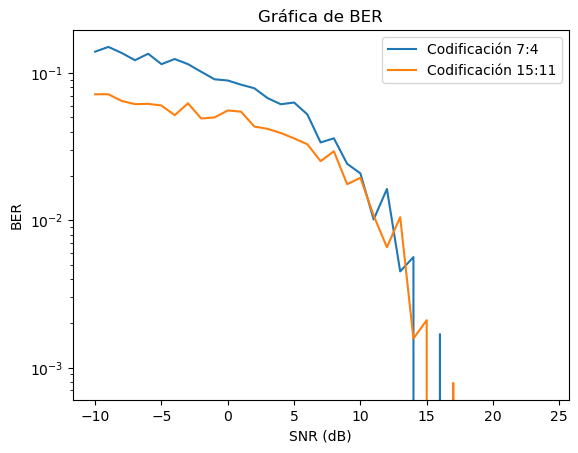

In [5]:
SNR1s = pd.read_excel('SNR74.xlsx',usecols="A") ##Carga datos del decodificador
BER1s = pd.read_excel('SNR74.xlsx',usecols="B")
BER2s = pd.read_excel('SNR1511.xlsx',usecols="B")
Lista_SNR1=np.array(SNR1s).T[0]
Lista_BER1=np.array(BER1s).T[0]
Lista_BER2=np.array(BER2s).T[0]

fig2=plt.figure()
plt.ylabel('BER')
plt.xlabel('SNR (dB)')
plt.title('Gráfica de BER')
plt.semilogy(Lista_SNR1,Lista_BER1,label="Codificación 7:4")
plt.semilogy(Lista_SNR1,Lista_BER2,label="Codificación 15:11")
plt.legend()
pp.savefig(fig2)


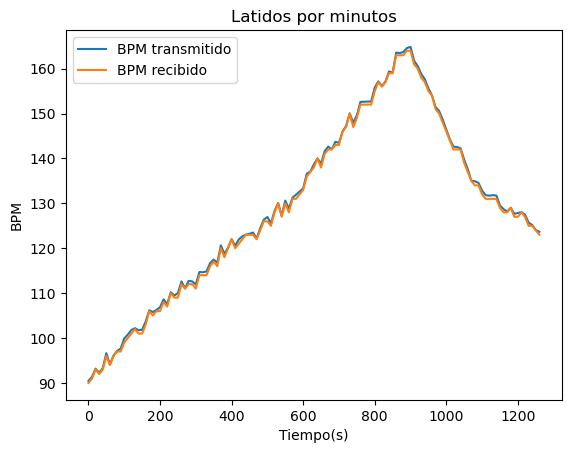

In [6]:
fig3 = plt.figure()
plt.ylabel('BPM')
plt.xlabel('Tiempo(s)')
plt.title('Latidos por minutos')
plt.plot(Tiempo,BPM,label="BPM transmitido")
plt.plot(Tiempo2,BPM2,label="BPM recibido")
plt.legend()


pp.savefig(fig3)

In [7]:
pp.close()